<Axes: xlabel='Meldedatum'>

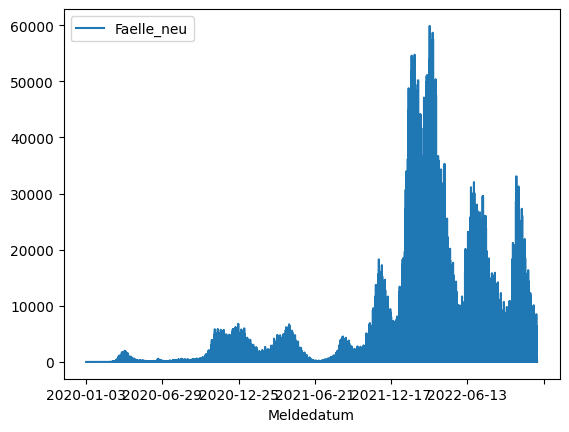

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

dataInfections = pd.read_csv('COVID-19-Faelle_7-Tage-Inzidenz_Bundeslaender.csv')
dataDeaths = pd.read_csv('COVID-19-Todesfaelle_Deutschland.csv')
dataInfections.plot(0, 5)

<Axes: xlabel='Meldedatum'>

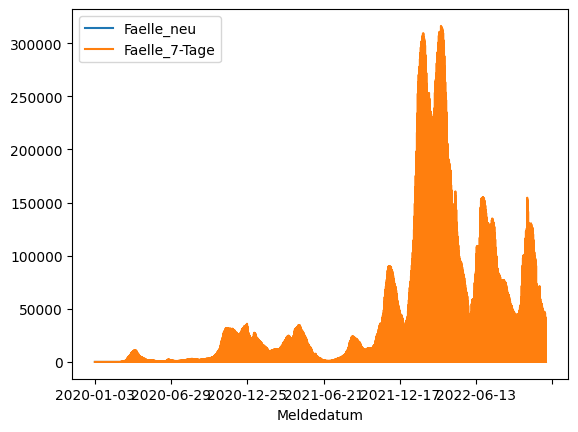

In [11]:
dataInfections.plot(0, [5,6])


array([<Axes: xlabel='Meldedatum'>, <Axes: xlabel='Meldedatum'>],
      dtype=object)

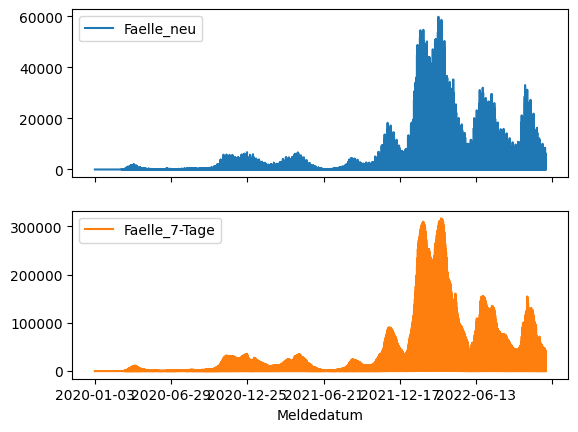

In [12]:
dataInfections.plot(0, [5,6], subplots=True)

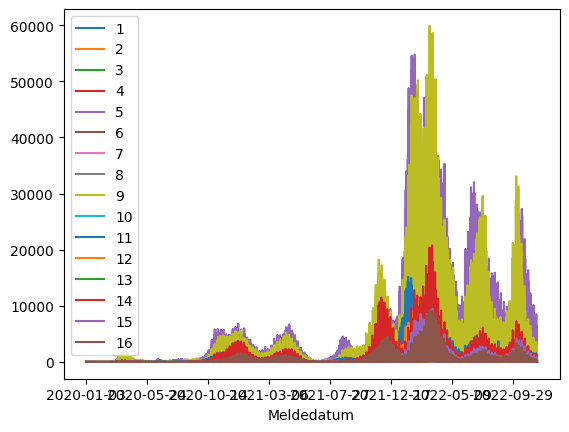

In [13]:
# Show data by state
fig, ax = plt.subplots()
for label, grp in dataInfections.groupby('Bundesland_id'):
    grp.plot(0, 5, ax=ax, label=label)

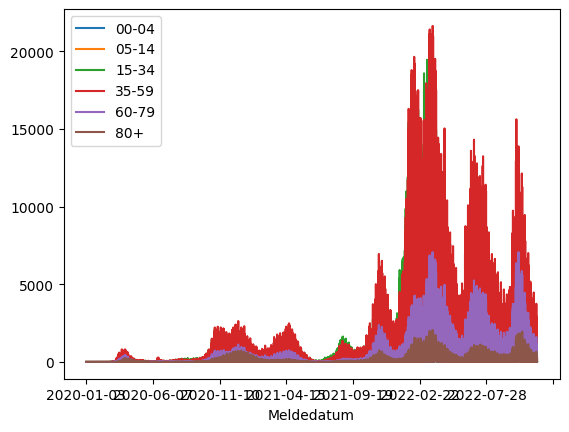

In [14]:
# Show data by age group
fig, ax = plt.subplots()
for label, grp in dataInfections[dataInfections["Altersgruppe"] != "00+"].groupby('Altersgruppe'):
    grp.plot(0, 5, ax=ax, label=label)

<Axes: xlabel='Bundesland_id'>

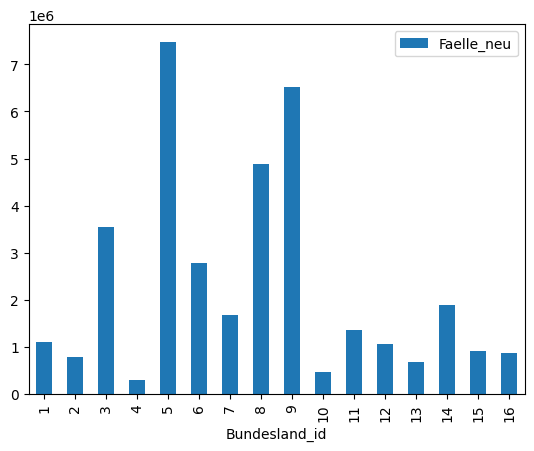

In [15]:
# Show data by bundesland as bar chart
dataInfections[dataInfections["Altersgruppe"] != "00+"].groupby('Bundesland_id').aggregate({'Faelle_neu': 'sum'}).plot(kind='bar')

<Axes: xlabel='Altersgruppe'>

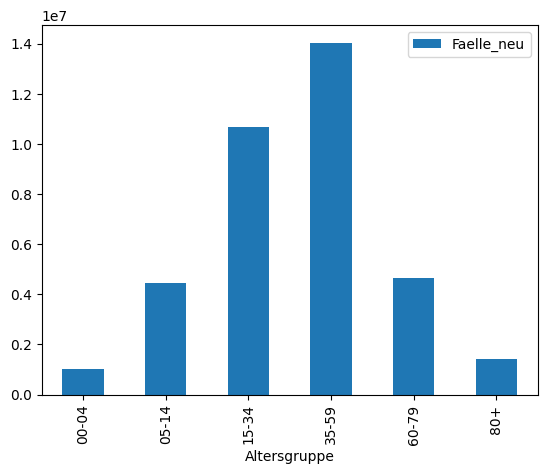

In [16]:
# Show data by age as bar chart
dataInfections[dataInfections["Altersgruppe"] != "00+"].groupby('Altersgruppe').aggregate({'Faelle_neu': 'sum'}).plot(kind='bar')

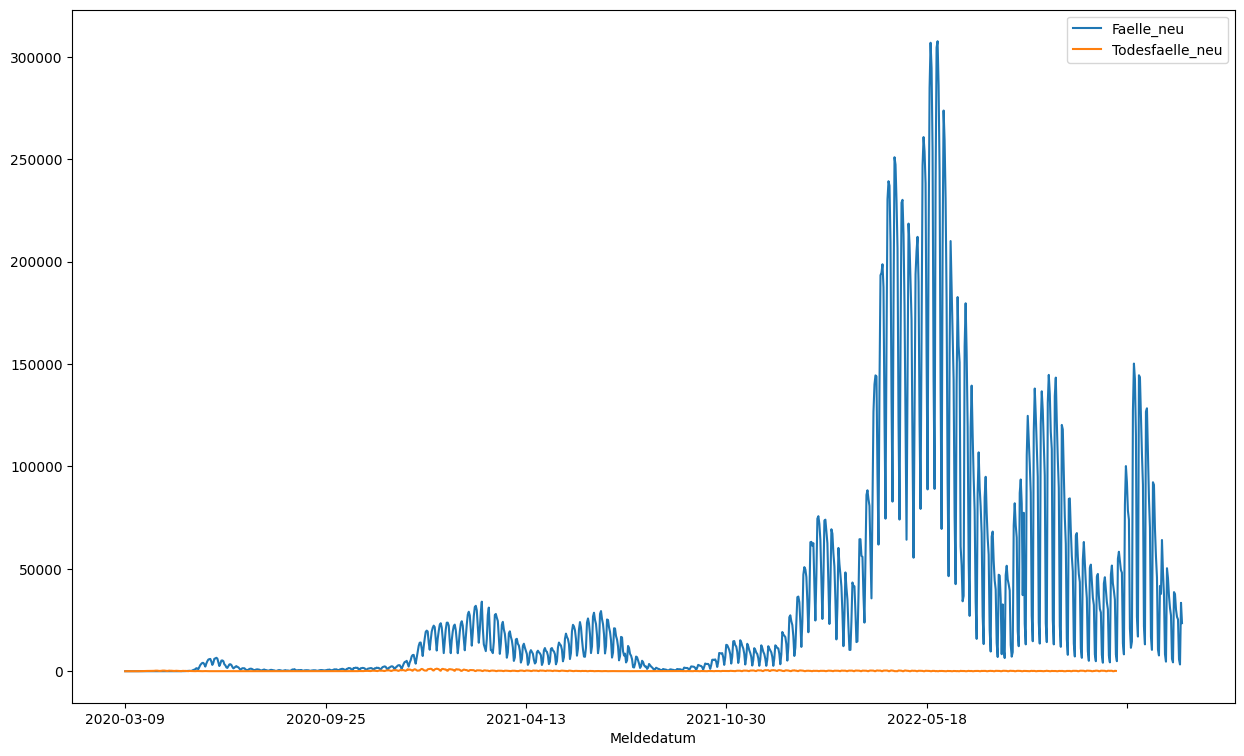

In [17]:
# Show data total per day
import matplotlib.pyplot as plt
figure, axes = plt.subplots(figsize=(15, 9))
first = dataInfections[dataInfections["Altersgruppe"] != "00+"].groupby("Meldedatum").aggregate({'Faelle_neu': 'sum'}).plot(ax=axes, kind='line')
second = dataDeaths.groupby("Meldedatum").aggregate({'Todesfaelle_neu': 'sum'}).plot(ax=axes, kind='line')

plt.show()

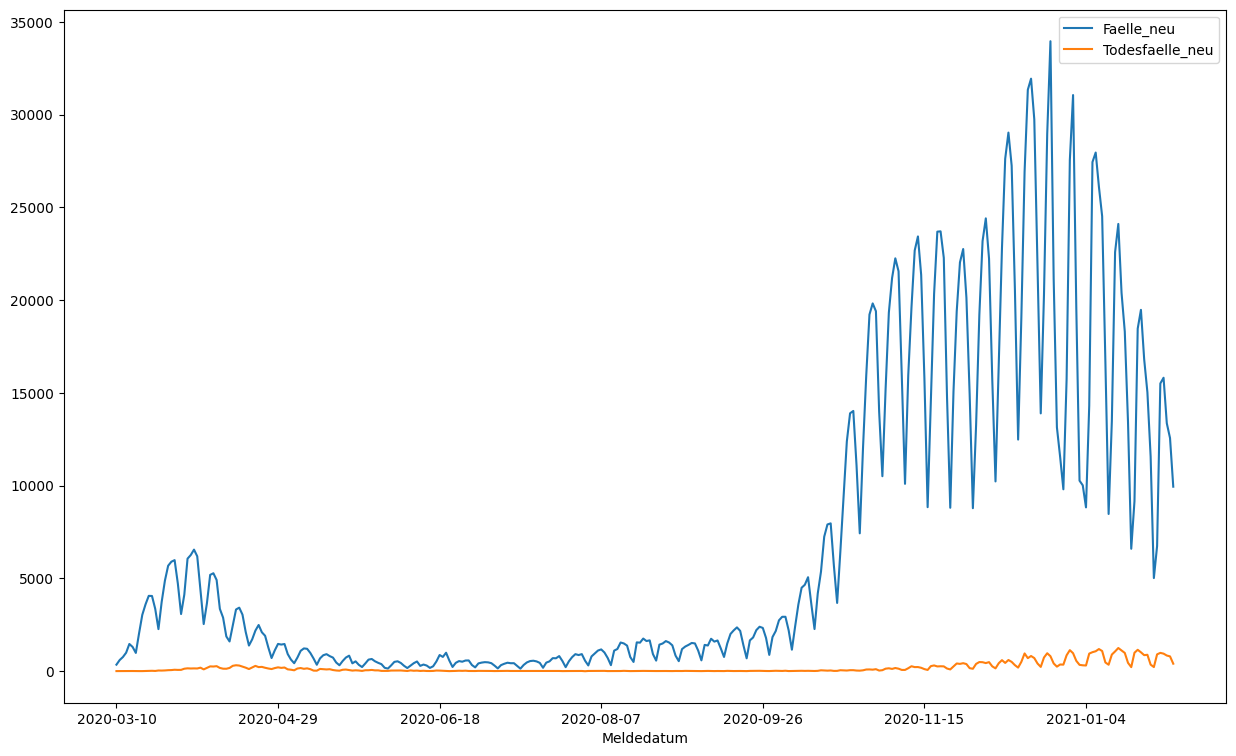

In [18]:
# Show data total per day
import matplotlib.pyplot as plt
figure, axes = plt.subplots(figsize=(15, 9))
first = dataInfections[dataInfections["Altersgruppe"] != "00+"]
second = dataDeaths

first = first.loc[(first['Meldedatum'] > '2020-03-09') & (first['Meldedatum'] < '2021-02-01')]
second = second.loc[(second['Meldedatum'] > '2020-03-09') & (second['Meldedatum'] < '2021-02-01')]

first = first.groupby("Meldedatum").aggregate({'Faelle_neu': 'sum'}).plot(ax=axes, kind='line')
second = second.groupby("Meldedatum").aggregate({'Todesfaelle_neu': 'sum'}).plot(ax=axes, kind='line')

plt.show()